Tesla Stock Price Analysis and Prediction using Linear Regression


**Date**-	The trading date of the stock

**Open** - The price at which Tesla stock opened for trading on that day

**High** - The highest price Tesla stock reached during the trading day

**Low** -	The lowest price Tesla stock reached during the day

**Close** -	The final price when the stock market closed on that day

**Adj Close** - The closing price adjusted for dividends and stock splits

**Volume** -	The total number of shares traded during that day

**load libraries**

In [14]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


**Load data set**

In [18]:
df = pd.read_csv('TSLA.csv')


In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


**prepare the data**

In [20]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [21]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


in here,data type of Date is **object**,we should convert it as the **datetime**

In [22]:
df['Date'] = pd.to_datetime(df['Date'])


In [23]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


**Explore and Visualize the Data**

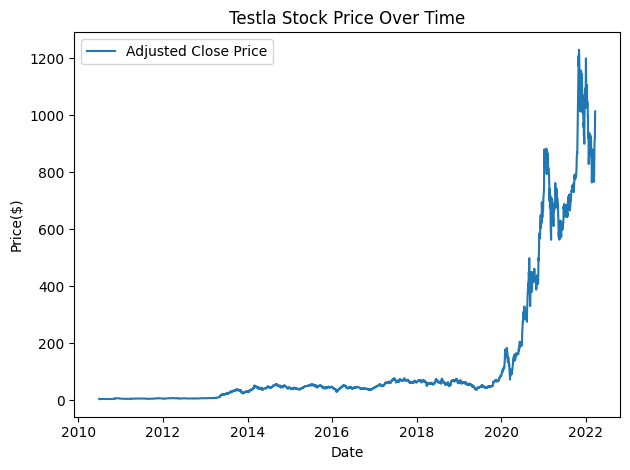

In [35]:
plt.plot(df['Date'],df['Adj Close'],label='Adjusted Close Price')
plt.title ('Testla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.legend()
plt.tight_layout()
plt.show()

**Build a simple Prediction Model**

try to predict Next day's price using linear regression


we create new column : Target for next day's price

In [38]:
df['Target'] = df['Adj Close'].shift(-1)

In [39]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Target'],
      dtype='object')

drop last raw

In [40]:
df = df[:-1]

Features and target

In [41]:
x = df[['Adj Close']]

In [42]:
y = df['Target']

Train -test split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle = False)

Train the model

In [46]:
model = LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_predict = model.predict(x_test)

In [50]:
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error(RMSE):",rmse)

Root Mean Squared Error(RMSE): 24.937269217818574


Plot Actual vs Predicted Prices

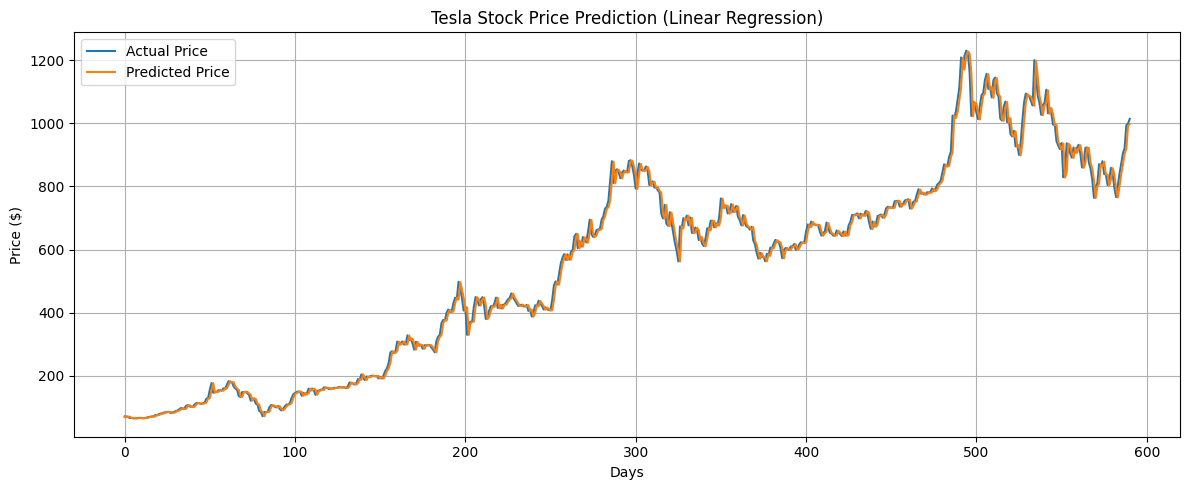

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_predict, label='Predicted Price')
plt.title("Tesla Stock Price Prediction (Linear Regression)")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The predicted values (orange) closely follow the actual values (blue), even through sharp rises and drops.